## Building load forecasting: Hospital in SF

We can train a forecaster on another commom energy problem. In this, case we are training a 1-step ahead forecaster to predict the electricity consumption of a building.

The dataset contains one year of hourly observations.
The training will occur on 11 months of the data, reserving the last month for evaluation.

In [1]:
import tensorboard
from torchsummary import summary
from torchviz import make_dot


In [2]:
if 'google.colab' in str(get_ipython()):
    !pip install git+https://github.com/ourownstory/neural_prophet.git # may take a while
    #!pip install neuralprophet # much faster, but may not have the latest upgrades/bugfixes
    
import pandas as pd
from neuralprophet import NeuralProphet, set_log_level
# set_log_level("ERROR")

In [3]:
# data_location = "https://raw.githubusercontent.com/ourownstory/neuralprophet-data/main/datasets/"
data_location = '../../../neuralprophet-data/datasets/'

sf_load_df = pd.read_csv(data_location +  'energy/SF_hospital_load.csv')

In [4]:
sf_load_df.head(3)

,ds,y
0,2015-01-01 01:00:00,778.007969
1,2015-01-01 02:00:00,776.241750
2,2015-01-01 03:00:00,779.357338


### Generic forecast: Time-based features only
In this first section, we will train a model with time-features only like we would do with Facebook Prophet.

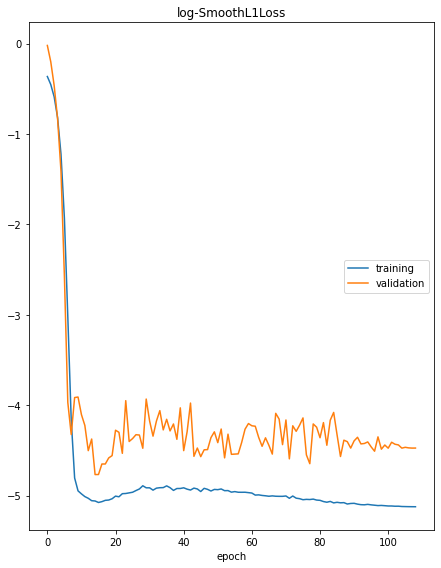

log-SmoothL1Loss
	training         	 (min:   -5.123, max:   -0.364, cur:   -5.123)
	validation       	 (min:   -4.767, max:   -0.020, cur:   -4.474)


In [5]:
m = NeuralProphet(
    weekly_seasonality=6,
    daily_seasonality=10,
    trend_reg=1,
    learning_rate=0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq='H', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

In [6]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.005957,45.730623,63.177513,0.002619,0.011402,63.927299,90.295357


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


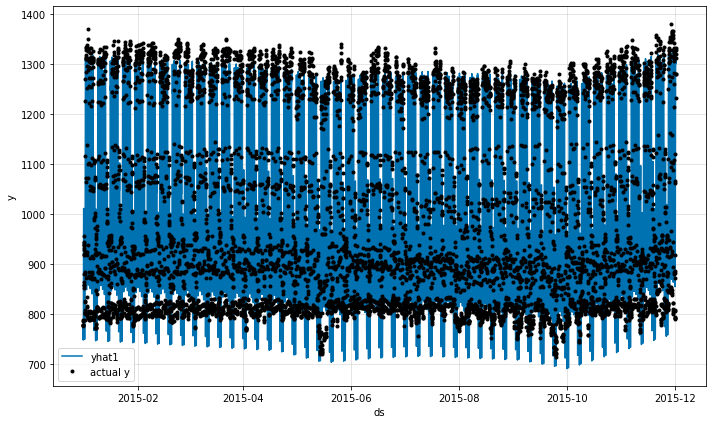

In [7]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.863% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H


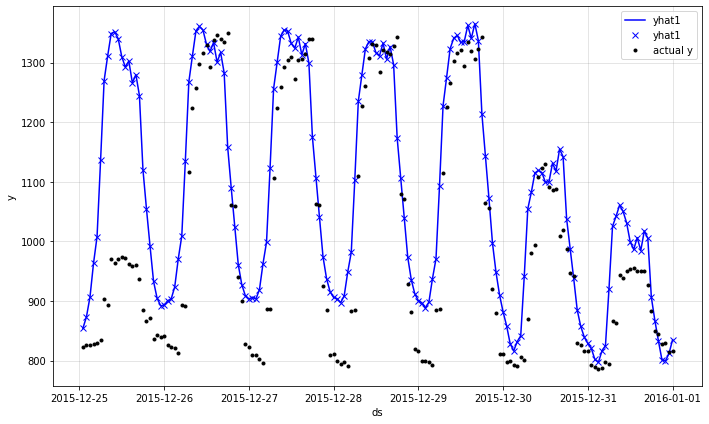

In [11]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

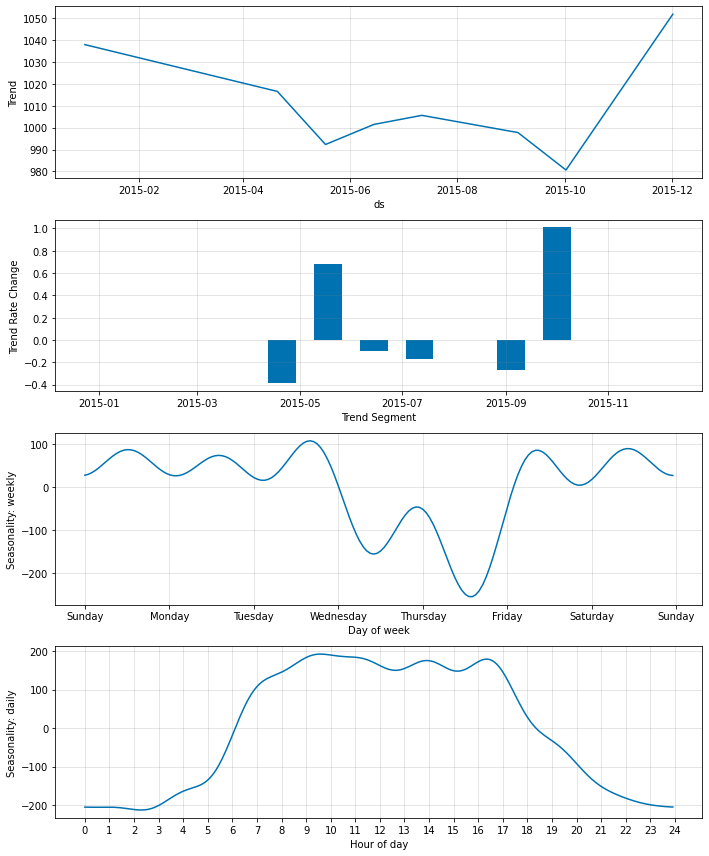

In [12]:
fig_param = m.plot_parameters()

In [13]:
summary(m.model)

Layer (type:depth-idx)                   Param #
├─ParameterDict: 1-1                     32
Total params: 32
Trainable params: 32
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─ParameterDict: 1-1                     32
Total params: 32
Trainable params: 32
Non-trainable params: 0

In [16]:
fig_1 = make_dot(m.train_epoch_prediction, params=dict(m.model.named_parameters()))
fig_1.render(filename='img/fig_1')

'img/fig_1.pdf'

## 1-step ahead forecast with Auto-Regression

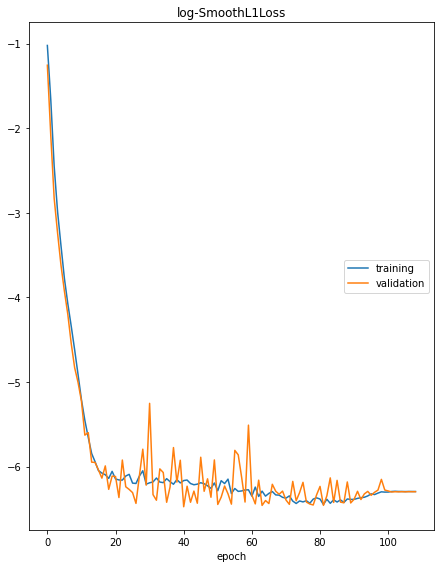

log-SmoothL1Loss
	training         	 (min:   -6.447, max:   -1.022, cur:   -6.294)
	validation       	 (min:   -6.474, max:   -1.255, cur:   -6.296)


In [17]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    ar_reg=1,
    learning_rate = 0.01,
)
df_train, df_test = m.split_df(sf_load_df, freq='H', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

In [18]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.001848,23.771001,35.147049,0.001147,0.001844,23.989048,36.316231


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:2349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:1649: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



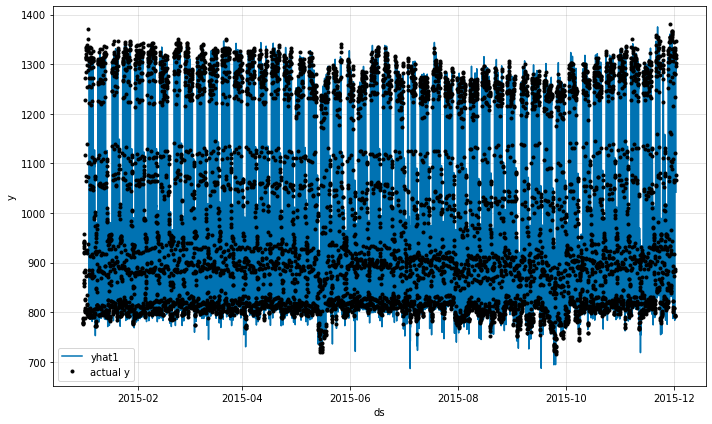

In [19]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:2349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.875% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:1649: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



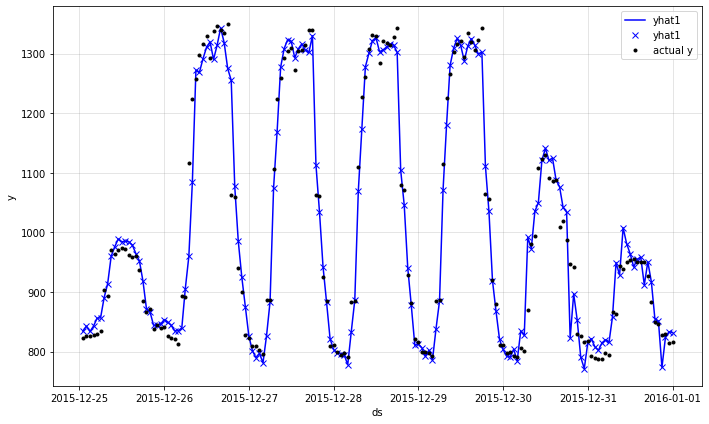

In [20]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

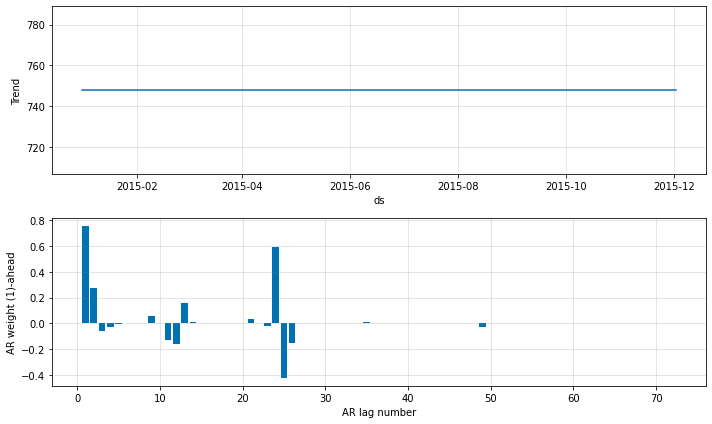

In [21]:
fig_param = m.plot_parameters()

In [22]:
summary(m.model)

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Linear: 2-1                       72
Total params: 72
Trainable params: 72
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Linear: 2-1                       72
Total params: 72
Trainable params: 72
Non-trainable params: 0

In [23]:
fig_2 = make_dot(m.train_epoch_prediction, params=dict(m.model.named_parameters()))
fig_2.render(filename='img/fig_2')

'img/fig_2.pdf'

## 1 step ahead forecast with AR-Net: Using a Neural Network
Here, we will use the power of a neural Network to fit non-linear patterns.

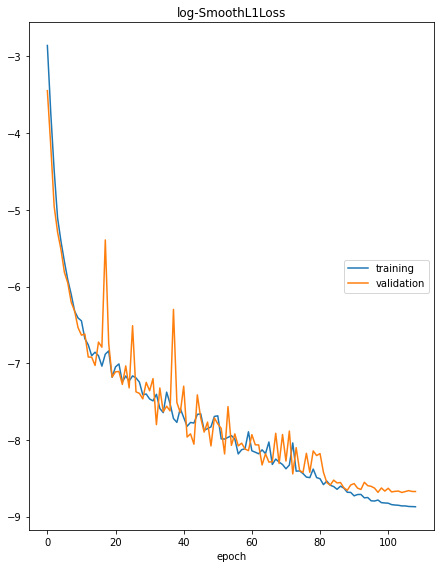

log-SmoothL1Loss
	training         	 (min:   -8.872, max:   -2.856, cur:   -8.872)
	validation       	 (min:   -8.686, max:   -3.446, cur:   -8.674)


In [24]:
m = NeuralProphet(
    growth='off',
    yearly_seasonality=False,
    weekly_seasonality=False,
    daily_seasonality=False,
    n_lags=3*24,
    num_hidden_layers=4,
    d_hidden=32,
    learning_rate=0.003,
)
df_train, df_test = m.split_df(sf_load_df, freq='H', valid_p = 1.0/12)

metrics = m.fit(df_train, freq='H', validation_df=df_test, progress='plot')

In [25]:
metrics.tail(1)

,SmoothL1Loss,MAE,RMSE,RegLoss,SmoothL1Loss_val,MAE_val,RMSE_val
108,0.00014,6.731951,9.679822,0.0,0.000171,7.420411,11.060288


INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:2349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.988% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:1649: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



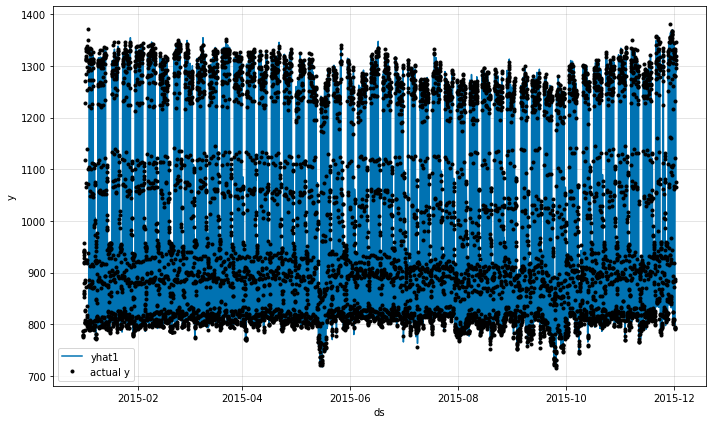

In [26]:
forecast = m.predict(df_train)
fig = m.plot(forecast)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.874% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:2349: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(future_df)

INFO - (NP.df_utils._infer_frequency) - Major frequency H corresponds to 99.875% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - H
WARNING - (py.warnings._showwarnmsg) - /home/alfonso/Desktop/local_code/data_science/neural_prophet/neuralprophet/forecaster.py:1649: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append(df_end_to_append)



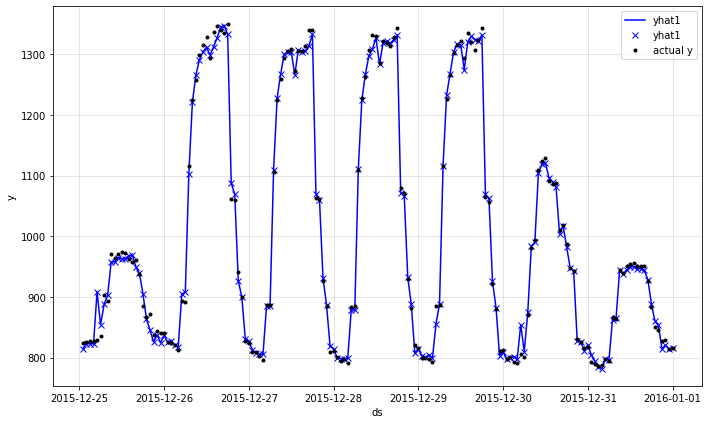

In [27]:
forecast = m.predict(df_test)
m = m.highlight_nth_step_ahead_of_each_forecast(1)
fig = m.plot(forecast[-7*24:])

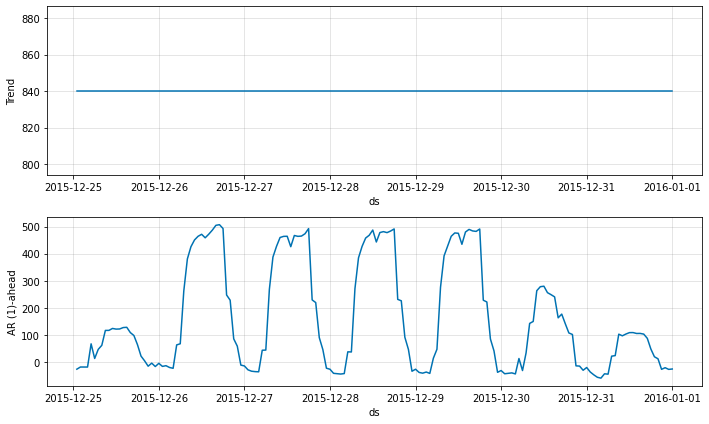

In [28]:
fig_comp = m.plot_components(forecast[-7*24:])

In [29]:
summary(m.model)

Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Linear: 2-1                       2,336
|    └─Linear: 2-2                       1,056
|    └─Linear: 2-3                       1,056
|    └─Linear: 2-4                       1,056
|    └─Linear: 2-5                       32
Total params: 5,536
Trainable params: 5,536
Non-trainable params: 0


Layer (type:depth-idx)                   Param #
├─ModuleList: 1-1                        --
|    └─Linear: 2-1                       2,336
|    └─Linear: 2-2                       1,056
|    └─Linear: 2-3                       1,056
|    └─Linear: 2-4                       1,056
|    └─Linear: 2-5                       32
Total params: 5,536
Trainable params: 5,536
Non-trainable params: 0

In [30]:
fig_3 = make_dot(m.train_epoch_prediction, params=dict(m.model.named_parameters()))
fig_3.render(filename='img/fig_3')

'img/fig_3.pdf'